In [1]:
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline
from scipy.io import loadmat
import decimal
data=loadmat(r'C:\Users\saminens\Desktop\ML\ex8_movies')

Average rating of Movie 1 is: 3.8783185840707963 /5


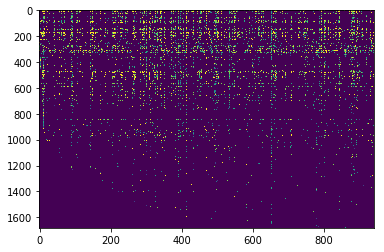

In [2]:
R=data['R']
Y=data['Y']
pt.imshow(Y,aspect='auto')               #rating is 1-5, non-zero cuz R=1 only if a movie is rated
print("Average rating of Movie 1 is: {} /5".format(np.mean(Y[0,np.nonzero(R[0,])]))) 

In [3]:
#Collaborative Filtering Cost Function
dat=loadmat(r'C:\Users\saminens\Desktop\ML\ex8_movieParams')
Theta=dat['Theta']
X=dat['X']
num_features=dat['num_features']
num_movies=dat['num_movies']
num_users=dat['num_users']

In [4]:
def cfcost(params,Y,R,num_users,num_movies,num_features,lambda1):
    X=params[0:num_movies*num_features].reshape(num_movies,num_features)
    Theta=params[num_movies*num_features:].reshape(num_users,num_features)
    X_grad=np.zeros((X.shape[0]))
    Theta_grad=np.zeros((Theta.shape[0]))
    J1=np.square(X.dot(Theta.T)-Y)
    J=(np.sum(np.sum(J1*R))/2) + (lambda1*(np.sum(np.square(X)))/2) + (lambda1*(np.sum(np.square(Theta)))/2)
    X_grad=(((X.dot(Theta.T)-Y)*R).dot(Theta)) + (lambda1*X)
    Theta_grad=(((X.dot(Theta.T)-Y)*R).T).dot(X) + (lambda1*Theta) #Careful with multiplying R
    grad = np.hstack((X_grad.ravel(), Theta_grad.ravel()))
    return J,grad

In [5]:
num_users = 4
num_movies = 5
num_features = 3
X = X[0:num_movies, 0:num_features]
Theta = Theta[0:num_users, 0:num_features]
Y = Y[0:num_movies, 0:num_users]
R = R[0:num_movies, 0:num_users]
J, grad = cfcost(np.append(X.flatten(), Theta.flatten()), Y, R, num_users, num_movies, num_features, 0)
J,grad

(22.224603725685675,
 array([ -2.52899165,   7.57570308,  -1.89979026,  -0.56819597,
          3.35265031,  -0.52339845,  -0.83240713,   4.91163297,
         -0.76677878,  -0.38358278,   2.26333698,  -0.35334048,
         -0.80378006,   4.74271842,  -0.74040871, -10.5680202 ,
          4.62776019,  -7.16004443,  -3.05099006,   1.16441367,
         -3.47410789,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]))

In [6]:
J, grad = cfcost(np.append(X.flatten(), Theta.flatten()), Y, R, num_users, num_movies, num_features, 1.5)
J

31.344056244274217

In [7]:
def computenumericalgradient(J,Theta):
    numgrad = np.zeros((Theta.shape[0]))
    perturb = np.zeros((Theta.shape[0]))
    e = 1e-4
    for p in range(np.size(Theta)):
        perturb[p] = e
        loss1 = J(Theta - perturb)
        loss2 = J(Theta + perturb)
        # Compute numerical gradient
        numgrad[p] = (loss2 - loss1)/(2 * e)
        perturb[p] = 0

    return numgrad
    

In [8]:
def checkcf(lambda1):
    X_t=np.random.random((4,3))
    Theta_t=np.random.random((5,3))
    Y = np.dot(Theta_t, X_t.T)
    Y[(np.random.random(Y.shape) > .5)] = 0
    R = np.zeros_like(Y)
    R[Y != 0] = 1

    # Run gradient checking
    X = np.random.random(np.shape(X_t))
    Theta = np.random.random(np.shape(Theta_t))
    num_users = Y.shape[1]
    num_movies = Y.shape[0]
    num_features = np.size(Theta_t,1)   
    params = np.append(X.flatten(), Theta.flatten())
    def reducedcf(p):
        return cfcost(p,Y, R, num_users, num_movies, num_features,lambda1)[0]
    numgrad=computenumericalgradient(reducedcf,params)
    J,grad=cfcost(np.append(X.flatten(), Theta.flatten()), Y, R, num_users, num_movies, num_features, lambda1)
    
    return numgrad,grad

In [9]:
checkcf(0) #numgrad and grad values are matching, which means cost function implementation is correct !!

(array([ 0.76337302,  0.27056801,  1.01690856,  0.77487758,  0.25569215,
         1.06028665,  0.2530707 ,  0.12002701,  0.22284624, -0.77660478,
        -0.60954111, -0.60802009,  1.05138019,  0.43578142,  1.42180529,
         1.3656495 ,  1.36765621,  1.08136594, -0.35222845, -0.05474951,
        -0.76723143,  1.21640638,  1.15173717,  1.07007569,  0.10627521,
         0.3165037 , -0.1016742 ]),
 array([ 0.76337302,  0.27056801,  1.01690856,  0.77487758,  0.25569215,
         1.06028665,  0.2530707 ,  0.12002701,  0.22284624, -0.77660478,
        -0.60954111, -0.60802009,  1.05138019,  0.43578142,  1.42180529,
         1.3656495 ,  1.36765621,  1.08136594, -0.35222845, -0.05474951,
        -0.76723143,  1.21640638,  1.15173717,  1.07007569,  0.10627521,
         0.3165037 , -0.1016742 ]))

In [10]:
#Learning movie ratings; but first enter ratings of new user
import pandas as pd
movieList = pd.read_table(r"C:\Users\saminens\Desktop\ML\movie_ids.txt",encoding='latin-1',names=["Movie"])
movies = movieList.Movie.tolist()
my_ratings = [0]*len(movies)
my_ratings[0] = 4
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53]= 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68]= 5
my_ratings[182]= 4
my_ratings[225]= 5
my_ratings[354]= 5
for i in range(len(movies)):
    if my_ratings[i] > 0:
        print("I rated " + str(movies[i]) +" " +str(my_ratings[i]))


I rated 1 Toy Story (1995) 4
I rated 7 Twelve Monkeys (1995) 3
I rated 12 Usual Suspects, The (1995) 5
I rated 54 Outbreak (1995) 4
I rated 64 Shawshank Redemption, The (1994) 5
I rated 66 While You Were Sleeping (1995) 3
I rated 69 Forrest Gump (1994) 5
I rated 98 Silence of the Lambs, The (1991) 2
I rated 183 Alien (1979) 4
I rated 226 Die Hard 2 (1990) 5
I rated 355 Sphere (1998) 5


In [11]:
def normalizeratings(Y,R):
    m,n=Y.shape
    Ymean = np.zeros((m,1))
    Ynorm = np.zeros((m,n))
    for i in range(m):
        idx=(R[i]==1)
        Ymean[i] = np.mean(Y[i,idx])
        Ynorm[i,idx] = Y[i,idx] - Ymean[i]
    return Ynorm, Ymean   

In [12]:
import scipy.optimize as opt
# Add own ratings to the data matrix
Y=data['Y']
R=data['R']
Y = np.hstack((np.asarray(my_ratings).reshape(movieList.shape), Y))
R = np.hstack((np.asarray(my_ratings).reshape(movieList.shape) != 0, R))
Ynorm, Ymean = normalizeratings(Y,R)
num_users=Y.shape[1]
num_movies=Y.shape[0]
num_features=10
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)
initial_params = np.hstack((X.flatten(), Theta.flatten()))
lambda2 = 10
def reducedcf(p):
    return cfcost(p,Y, R, num_users, num_movies, num_features,lambda2)
result = opt.minimize(fun=reducedcf, x0=initial_params,method='CG', jac=True, options={'maxiter': 150})
X = result.x[0:num_movies * num_features].reshape((num_movies, num_features))
Theta = result.x[num_movies * num_features:].reshape((num_users, num_features))


In [19]:
p= X.dot(Theta.T)
my_predictions = p[:,0] + Ymean.T.ravel()
sorted_pred = np.sort(my_predictions)
idx=np.argsort(my_predictions.ravel())
for i in range(10):
    j=idx[-i]
    print ("Predicted rating "+str(int(my_predictions[j]))+" for movie "+str(movies[j]))

print ('\nOriginal ratings provided:') #in the output, the movie id is also given.
for i in range(len(my_ratings)):
    if my_ratings[i]>0:
        print ("Original Rating "+str(my_ratings[i])+" for movie "+str(movies[i]))


Predicted rating 1 for movie 1582 T-Men (1947)
Predicted rating 8 for movie 313 Titanic (1997)
Predicted rating 8 for movie 50 Star Wars (1977)
Predicted rating 8 for movie 64 Shawshank Redemption, The (1994)
Predicted rating 8 for movie 174 Raiders of the Lost Ark (1981)
Predicted rating 8 for movie 318 Schindler's List (1993)
Predicted rating 8 for movie 272 Good Will Hunting (1997)
Predicted rating 8 for movie 12 Usual Suspects, The (1995)
Predicted rating 8 for movie 22 Braveheart (1995)
Predicted rating 8 for movie 172 Empire Strikes Back, The (1980)

Original ratings provided:
Original Rating 4 for movie 1 Toy Story (1995)
Original Rating 3 for movie 7 Twelve Monkeys (1995)
Original Rating 5 for movie 12 Usual Suspects, The (1995)
Original Rating 4 for movie 54 Outbreak (1995)
Original Rating 5 for movie 64 Shawshank Redemption, The (1994)
Original Rating 3 for movie 66 While You Were Sleeping (1995)
Original Rating 5 for movie 69 Forrest Gump (1994)
Original Rating 2 for movie 9